## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(study_results, mouse_metadata, how ='left', on = "Mouse ID")

# Display the data table for preview


df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice.

len(df["Mouse ID"].unique())


249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_ID = df.loc[df.duplicated(subset = ["Mouse ID" , "Timepoint"]), "Mouse ID" ].unique()

duplicate_mouse_ID

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = df.loc[df["Mouse ID"]== "g989"]

duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


clean_df = df.drop(duplicate_mouse_data.index)

clean_df




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [12]:
# Checking the number of mice in the clean DataFrame.
 

len(clean_df["Mouse ID"].unique())
    



248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



summary_statistics = df[["Timepoint" , "Tumor Volume (mm3)", "Drug Regimen"]]


grouped_summary =  summary_statistics.groupby(["Drug Regimen"])


grouped_summary

In [14]:
mean = grouped_summary["Tumor Volume (mm3)"].mean()

median = grouped_summary["Tumor Volume (mm3)"].median()

variance = grouped_summary["Tumor Volume (mm3)"].var()

standard_dev = grouped_summary["Tumor Volume (mm3)"].std()

SEM = grouped_summary["Tumor Volume (mm3)"].sem() 





summary_table = pd.DataFrame ({"Mean": mean,
                               "Median": median,
                               "Varianace": variance,
                               "Standard Deviation":standard_dev,
                               "SEM":SEM })

summary_table

,Mean,Median,Varianace,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
 # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


summary_statistics2 = df[["Tumor Volume (mm3)", "Drug Regimen"]]


grouped_summary2 =  summary_statistics2.groupby(["Drug Regimen"])

grouped_summary2.agg(['mean', 'median', "var" , "std" , "sem" ])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

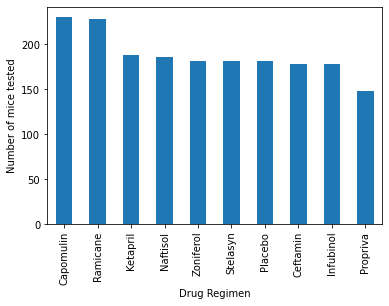

In [35]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
chart = clean_df['Drug Regimen'].value_counts()


chart.plot(kind = "bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice tested")
plt.show()

In [45]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.


x_axis = np.arange(chart)


plt.bar(chart.values , x_axis, chart["Timepoint"])

plt.title("number of mice on each drug throught the study ")

plt.xlabel("Drug Regimen")

plt.ylabel("Number of mice tested")

plt.show()



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

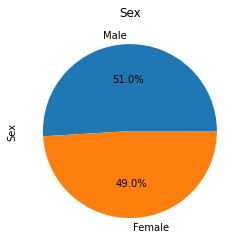

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_df = clean_df["Sex"].value_counts()

plt.figure()

sex_df.plot(kind = "pie", autopct = '%1.1f%%')

plt.title('Sex')

plt.show()





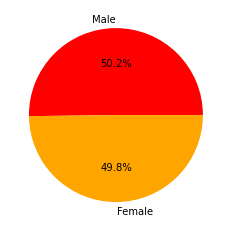

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#sex_df = ["Male", "Female"]

labels = ["Male","Female"]

sizes = [50.2, 49.8]

colors = ["red","orange"]

plt.pie(sizes, labels=labels, colors = colors, autopct="%.1f%%" );




## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_timepoint_data = clean_df[["Timepoint" , "Mouse ID", "Drug Regimen"]]

timepoint = clean_df.groupby("Mouse ID") ["Timepoint"].max()

timepoint


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_data = pd.merge(timepoint, clean_df, how = 'left', on=("Mouse ID" , "Timepoint"))

merged_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [43]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = df.loc[df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    
    # Determine outliers using upper and lower bounds
    
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


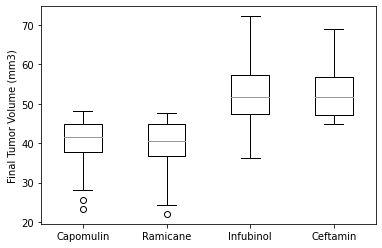

In [44]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_vol_list, labels = treatment_list)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

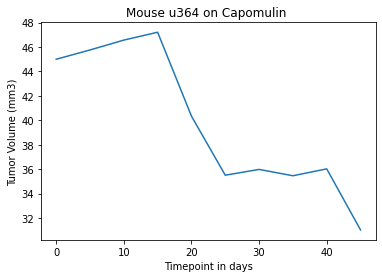

In [31]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

line_plot = capomulin.loc[capomulin["Mouse ID"]== "u364"]


#Line plot
plt.plot(line_plot['Timepoint'],line_plot['Tumor Volume (mm3)'])

plt.xlabel('Timepoint in days')

plt.ylabel('Tumor Volume (mm3)')

plt.title('Mouse u364 on Capomulin ')

plt.show()


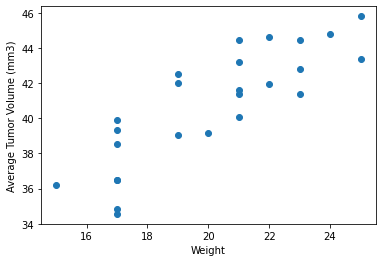

In [33]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

avg_tumor_vol = capomulin.groupby(["Mouse ID"]).mean()

#scatter plot

plt.scatter(avg_tumor_vol["Weight (g)"], avg_tumor_vol['Tumor Volume (mm3)'])

plt.xlabel("Weight")

plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
